# İTÜ DATA SCIENCE BİTİRME PROJESİ

<b>Portekiz bankasından alınmış olan bu veri seti içeriğinde kurumun telefon görüşmeleri ile yapmış olduğu pazarlama kampanyaları detayları yer almaktadır. Bu telefon görüşmeleri sonucunda müşterinin "vadeli mevduat" ürününe sahip olup olmayacağı ("evet" ya da "hayır") tahminlenmeye çalışılmıştır. 
Veri içeriğinde 45211 instances ve 17 attributes bulunmaktadır.<b>

In [1]:
import pandas as pd
import numpy as np

## Betimleyici Analitik Adımları

In [2]:
df = pd.read_csv("bank_marketing.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


<img src="11.png">

<b>Veri tiplerini inceliyoruz<b>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
print("Bank marketing veri seti {rows} satır veri içermektedir.".format(rows = len(df)))

Bank marketing veri seti 45211 satır veri içermektedir.


<b>Verinin mod,medyan, ortalama gibi değerlerini inceliyoruz.<b>

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


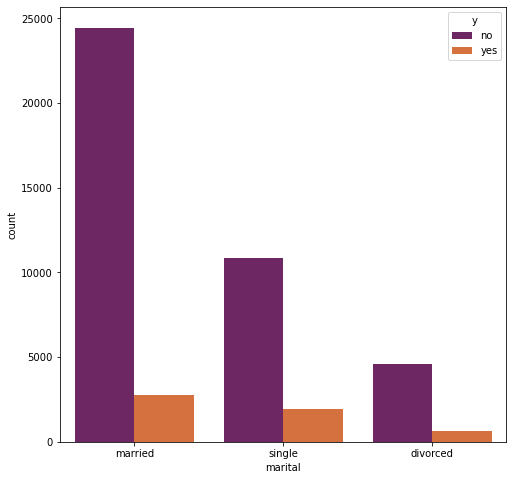

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))

sns.countplot(x = 'marital', hue = 'y', data=df, palette = 'inferno')

plt.show()

<b> Üstteki görselde gördüğümüz üzere bankada vadeli para tutma oranları bekar insanlarda daha yüksek <b>

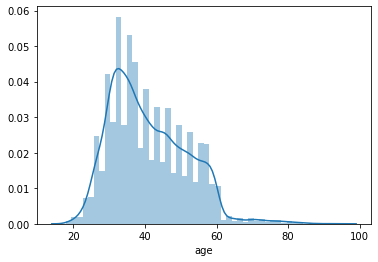

In [7]:
sns.distplot(df.age)

<b>Bu görselde yaş değerlerinin dağılımını inceledik. İletişime geçilen müşterilerin yaşları 30 ile 40 arasında yoğunlaştığı gözleniyor. <b>

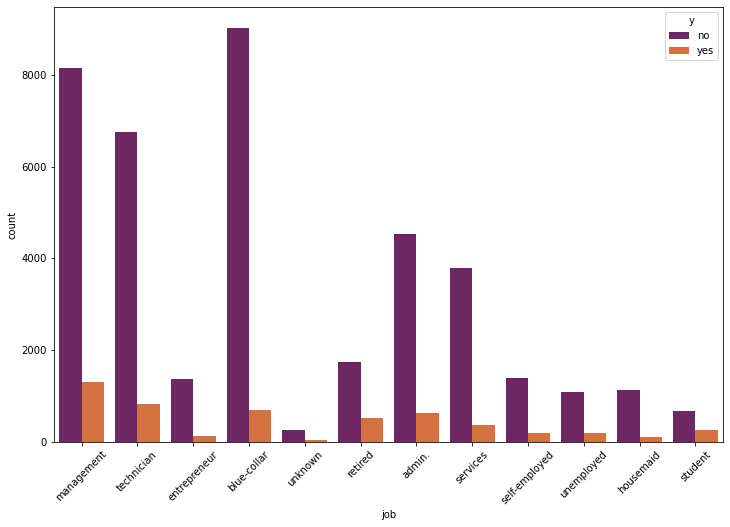

In [8]:
plt.figure(figsize=(12,8))

sns.countplot(x = 'job', hue = 'y', data=df,palette = 'inferno')

plt.xticks(rotation=45)
plt.show()

<b>Yukarıdaki görselde meslek dağılımlarına göre kişilerin vadeli hesap adetlerini görüyoruz. Oran olarak baktığımızda öğrencilerin vadeli hesap adetlerinin yüksek olduğu gözleniyor, bunun yanı sıra mavi yakalı olarak ifade edilen çalışanların ise vadeli hesap oranının çok düşük olduğu görülmektedir. <b>

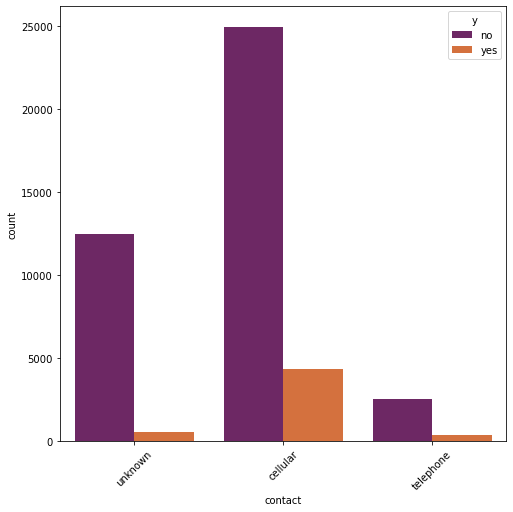

In [9]:
plt.figure(figsize=(8,8))

sns.countplot(x = 'contact', hue = 'y', data=df, palette = 'inferno')

plt.xticks(rotation=45)
plt.show()

<b>Hücresel iletişim türü olan müşterilerin vadeli mevduat hesap adedi en yüksek olduğu görülüyor.<b>

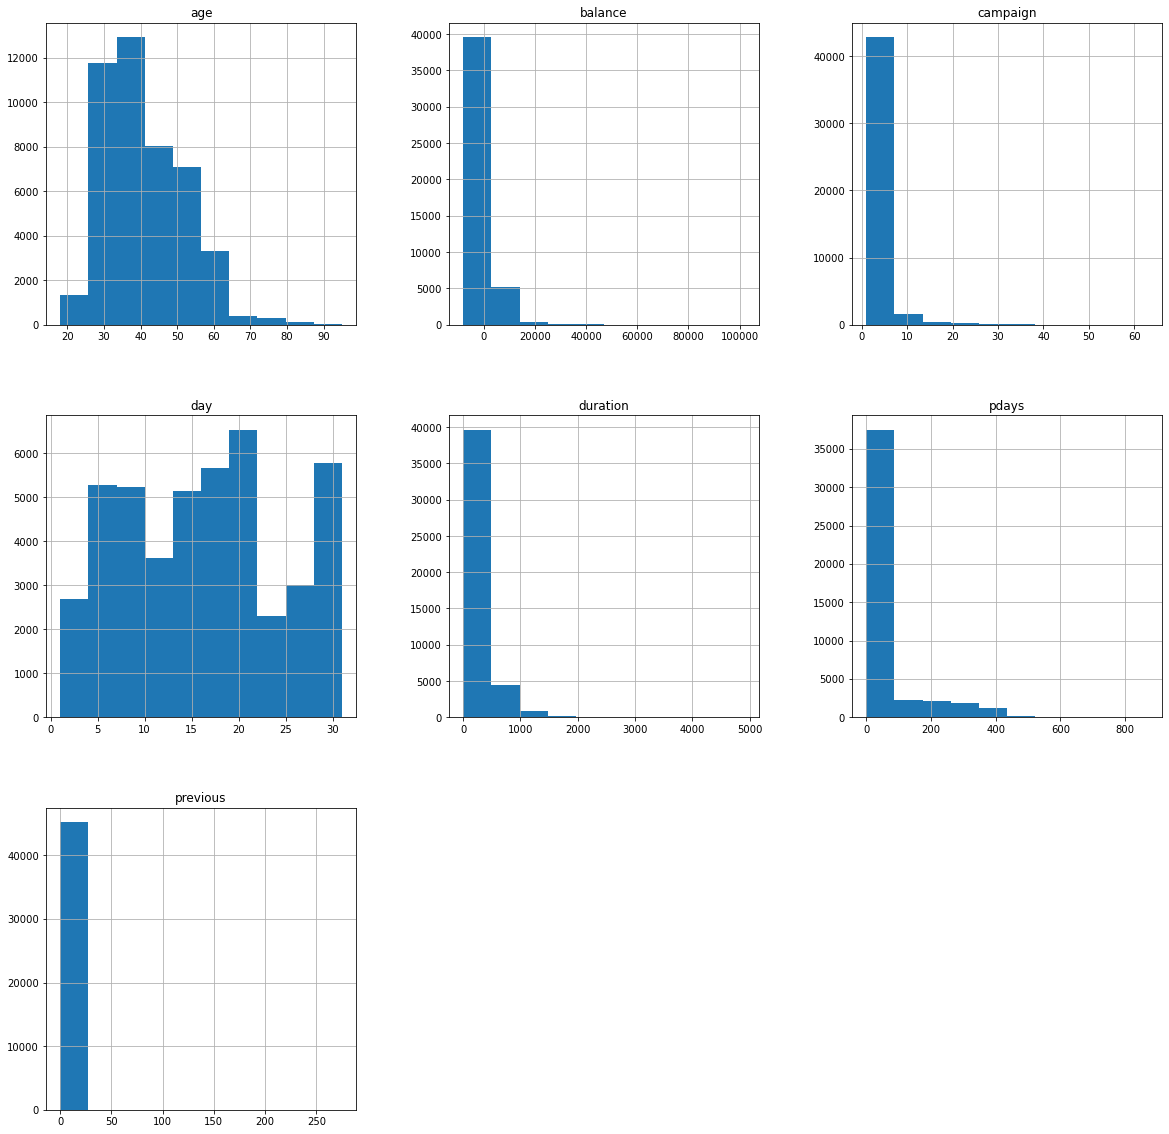

In [10]:
numerik_degiskenler=df.describe().columns
df.hist(column=numerik_degiskenler,figsize=(20,20))
plt.show()

<b>Bu görselde nümerik değişkenlerimizin tamamının histogramını inceledik.<b>

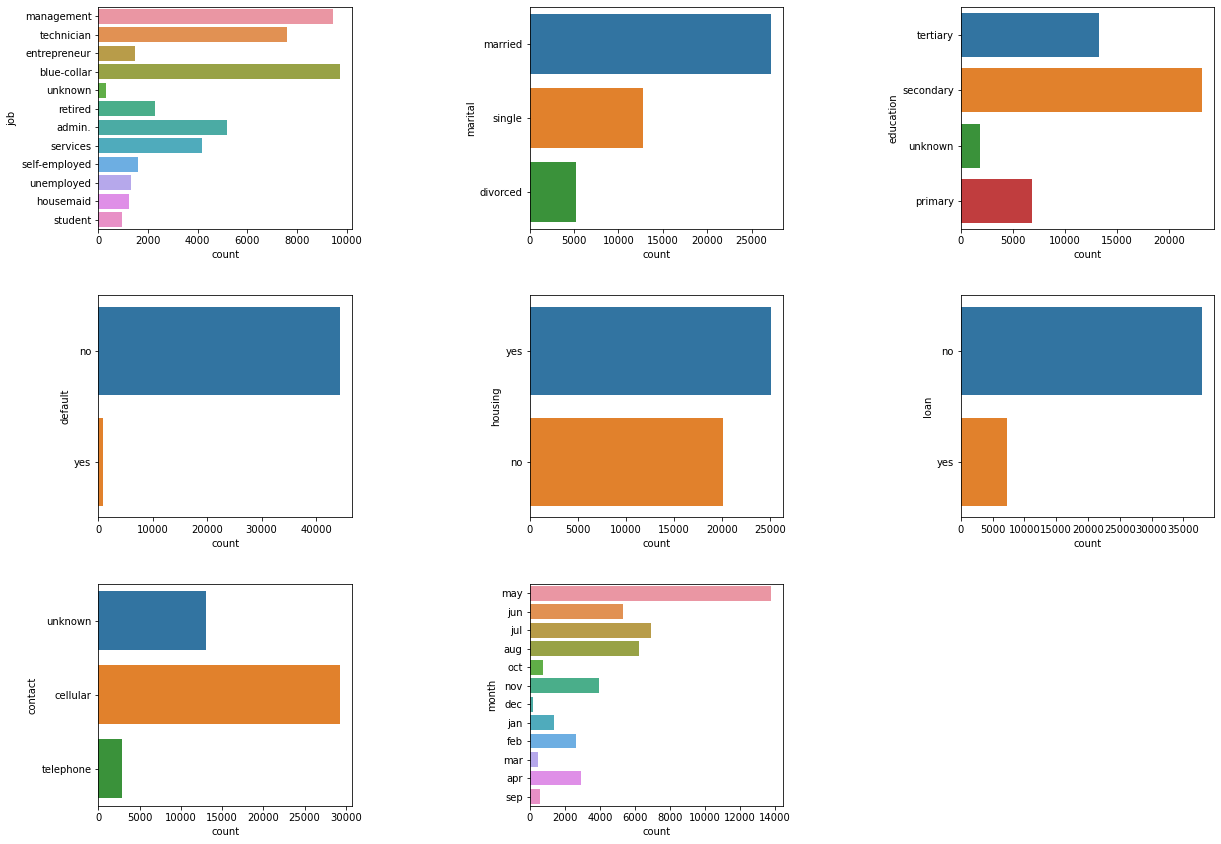

In [11]:
kategorik_degiskenler=df.describe(include=[object]).columns

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 7:
        ax.set_visible(False)
        continue
    sns.countplot(y = kategorik_degiskenler[i], data=df, ax=ax)
plt.show()

<b>Bu görselde kategorik değişkenlerimizin tamamını çubuk grafikte inceledik.<b>

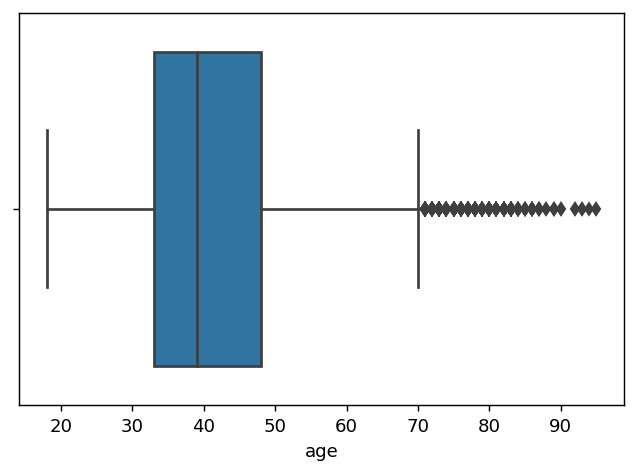

In [12]:
#age değerlerimizde outlier'lar var mı bakalım:

plt.figure(dpi=130)
sns.boxplot(df["age"])
plt.show()

<b> Bu görselde yaş değişkenin outlier değerleri olduğunu tespit ettik.<b>

## Veri Temizleme ve İşleme Adımları

<b>Her satır için eksik değerlerin yüzdesine baktığımızda null değer olmadığını görüyoruz. 
   Eğer eksik değerler olsaydı bunları medyan, ortalama veya mod ile doldurmamız gerekecekti.<b>

In [13]:
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

<b>interquartile range belirliyoruz <b>

In [14]:
q1 = df["age"].quantile(0.25)
q3 = df["age"].quantile(0.75)

iqr = q3 - q1

print("1st Quartile: " + str(q1))
print("3rd Quartile: " + str(q3))
print("Inter-quartile range: " + str(iqr))

1st Quartile: 33.0
3rd Quartile: 48.0
Inter-quartile range: 15.0


In [15]:
#age kolonu için alt ve üst sınırlarımızı belirlelim : bu sınırlar dışındaki veriler OUTLIER'lardır. 
lower_age_bound = q1 - 1.5*iqr
upper_age_bound = q3 + 1.5*iqr

# 1.5 genel olarak kullanılan sayı, fakat siz değiştirebilirsiniz. 

print("Lower age bound: " + str(lower_age_bound))
print("Upper age bound: " + str(upper_age_bound))

Lower age bound: 10.5
Upper age bound: 70.5


<b>IQR sonrası 10 yaş altı ve 70 yaş üstü değerlerin outlier olduğunu görüyoruz. Bu nedenle bu verileri kaldıracağız.<b>

In [16]:
df.age.isnull().sum()

0

In [17]:
# kabul edilebilir range'in dışındaki değerleri (outlier'Ları) NON yapacağız.
df.age = df.age.map(lambda x: x if lower_age_bound < x < upper_age_bound else np.nan)

df.age.isnull().sum()
#487 adet outlier verimiz olduğunu tespit ettik. Bu satırları veri setinden kaldıracağız.

487

In [18]:
df_new = df[~df['age'].isnull()]
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23.0,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25.0,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51.0,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45209,57.0,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [19]:
print(len (df_new[df_new['pdays'] < 0] ) / len(df_new) * 100)
print(len (df_new[df_new['pdays'] > 400] ) / len(df_new) * 100)

81.94258116447544
0.5142652714426259


pdays kolonu müşteriyle bir önceki kampanya için iletişime geçildikten sonraki gün sayısını gösteriyor.İlgili kolonun detayına baktığımızda -1 içeren değerin yüzde 82lik büyük bir bölümü oluşturduğunu. 400 ve üzerindeki değerlerin ise %0.52 sini oluşturduğunu görüyoruz. 
-1 muhtemelen müşteriyle daha önce iletişime geçilmediği veya eksik verileri temsil ettiği anlamına geliyor diye yorumladık. Bu kolonun modelimize bir faydası olmayacağını düşündüğümüz için kaldıracağız.

<b> ML kısmına geçmeden önce veri setimizi işleme adımını yapmamız gerekmektedir. 
    Veri setimizi incelediğimizde hedef değişken olan "y" içeriğindeki "yes", "no" değerlerine binary(0,1) hale getirmemiz gerekmektedir. 
    Aynı şekilde cinsiyet, eğitim durumu vs içeren kategorik sütunları da dummy değişkenlere dönüştürmemiz gerekmektedir.<b>

In [20]:
def get_dummy_from_bool(row, column_name):
    
    return 1 if row[column_name] == 'yes' else 0
#sütun içeriği hayır ise 0, evet ise 1 döndür

def get_correct_values(row, column_name, threshold, df):
    
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean
#eğer değer threshold yani sınırın üzerindeyse ortalama değeri ver

In [21]:
#temizlenmiş datayı hazırlıyoruz
def clean_data(df):
    
    cleaned_df = df_new.copy() #ana veri setimizi kopyalıyoruz
    
    bool_columns = ['default','housing','loan','y']
    
    for bool_col in bool_columns:
        
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    #evet ve hayır içeren değişkenlere 0-1 atıyoruz.
    
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    #kategorik veri içeren değişkenler dummy değişkenlere dönüştürüldü
    
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    #pdays kolonunu kaldırmaya karar vermiştik
    

    return cleaned_df

In [22]:
cleaned_df = clean_data(df_new)
cleaned_df.head()

,age,balance,day,duration,campaign,previous,default_bool,housing_bool,loan_bool,y_bool,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2143,5,261,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44.0,29,5,151,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33.0,2,5,76,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47.0,1506,5,92,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33.0,1,5,198,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [23]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44724 entries, 0 to 45210
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  44724 non-null  float64
 1   balance              44724 non-null  int64  
 2   day                  44724 non-null  int64  
 3   duration             44724 non-null  int64  
 4   campaign             44724 non-null  int64  
 5   previous             44724 non-null  int64  
 6   default_bool         44724 non-null  int64  
 7   housing_bool         44724 non-null  int64  
 8   loan_bool            44724 non-null  int64  
 9   y_bool               44724 non-null  int64  
 10  job_blue-collar      44724 non-null  uint8  
 11  job_entrepreneur     44724 non-null  uint8  
 12  job_housemaid        44724 non-null  uint8  
 13  job_management       44724 non-null  uint8  
 14  job_retired          44724 non-null  uint8  
 15  job_self-employed    44724 non-null 

<b>Vadeli yatırmak ile diğer değişkenler arasındaki pozitif korelasyona baktığımızda en yüksek öznitelikler şu şekilde;
- "Duration" kolonu yani son telefon konuşmasının uzunluğu 0.39 ile en yüksek pozitif etki yaptığı gözlemleniyor. 
- "poutcome success" yani bir önceki pazarlama kampanyasının başarılı sonuç vermesi 0.31 ile ikinci en yüksek pozitif etkiyi yaptığını görüyoruz.
- Ev kredisi alınmaması da yüksek etki edenler arasında.
- Ayrıca kampanya için aranan mart, eylül ve ekim ayları en çok pozitif etki yaratan aylar olarak göze çarpıyor.
    <b>

Not: Görsel biraz büyük olduğu için okunması zor ancak sadece bu veriyi analiz etmek bile kampanya hedefini belirleme aşamasında büyük rol oynayabilir.

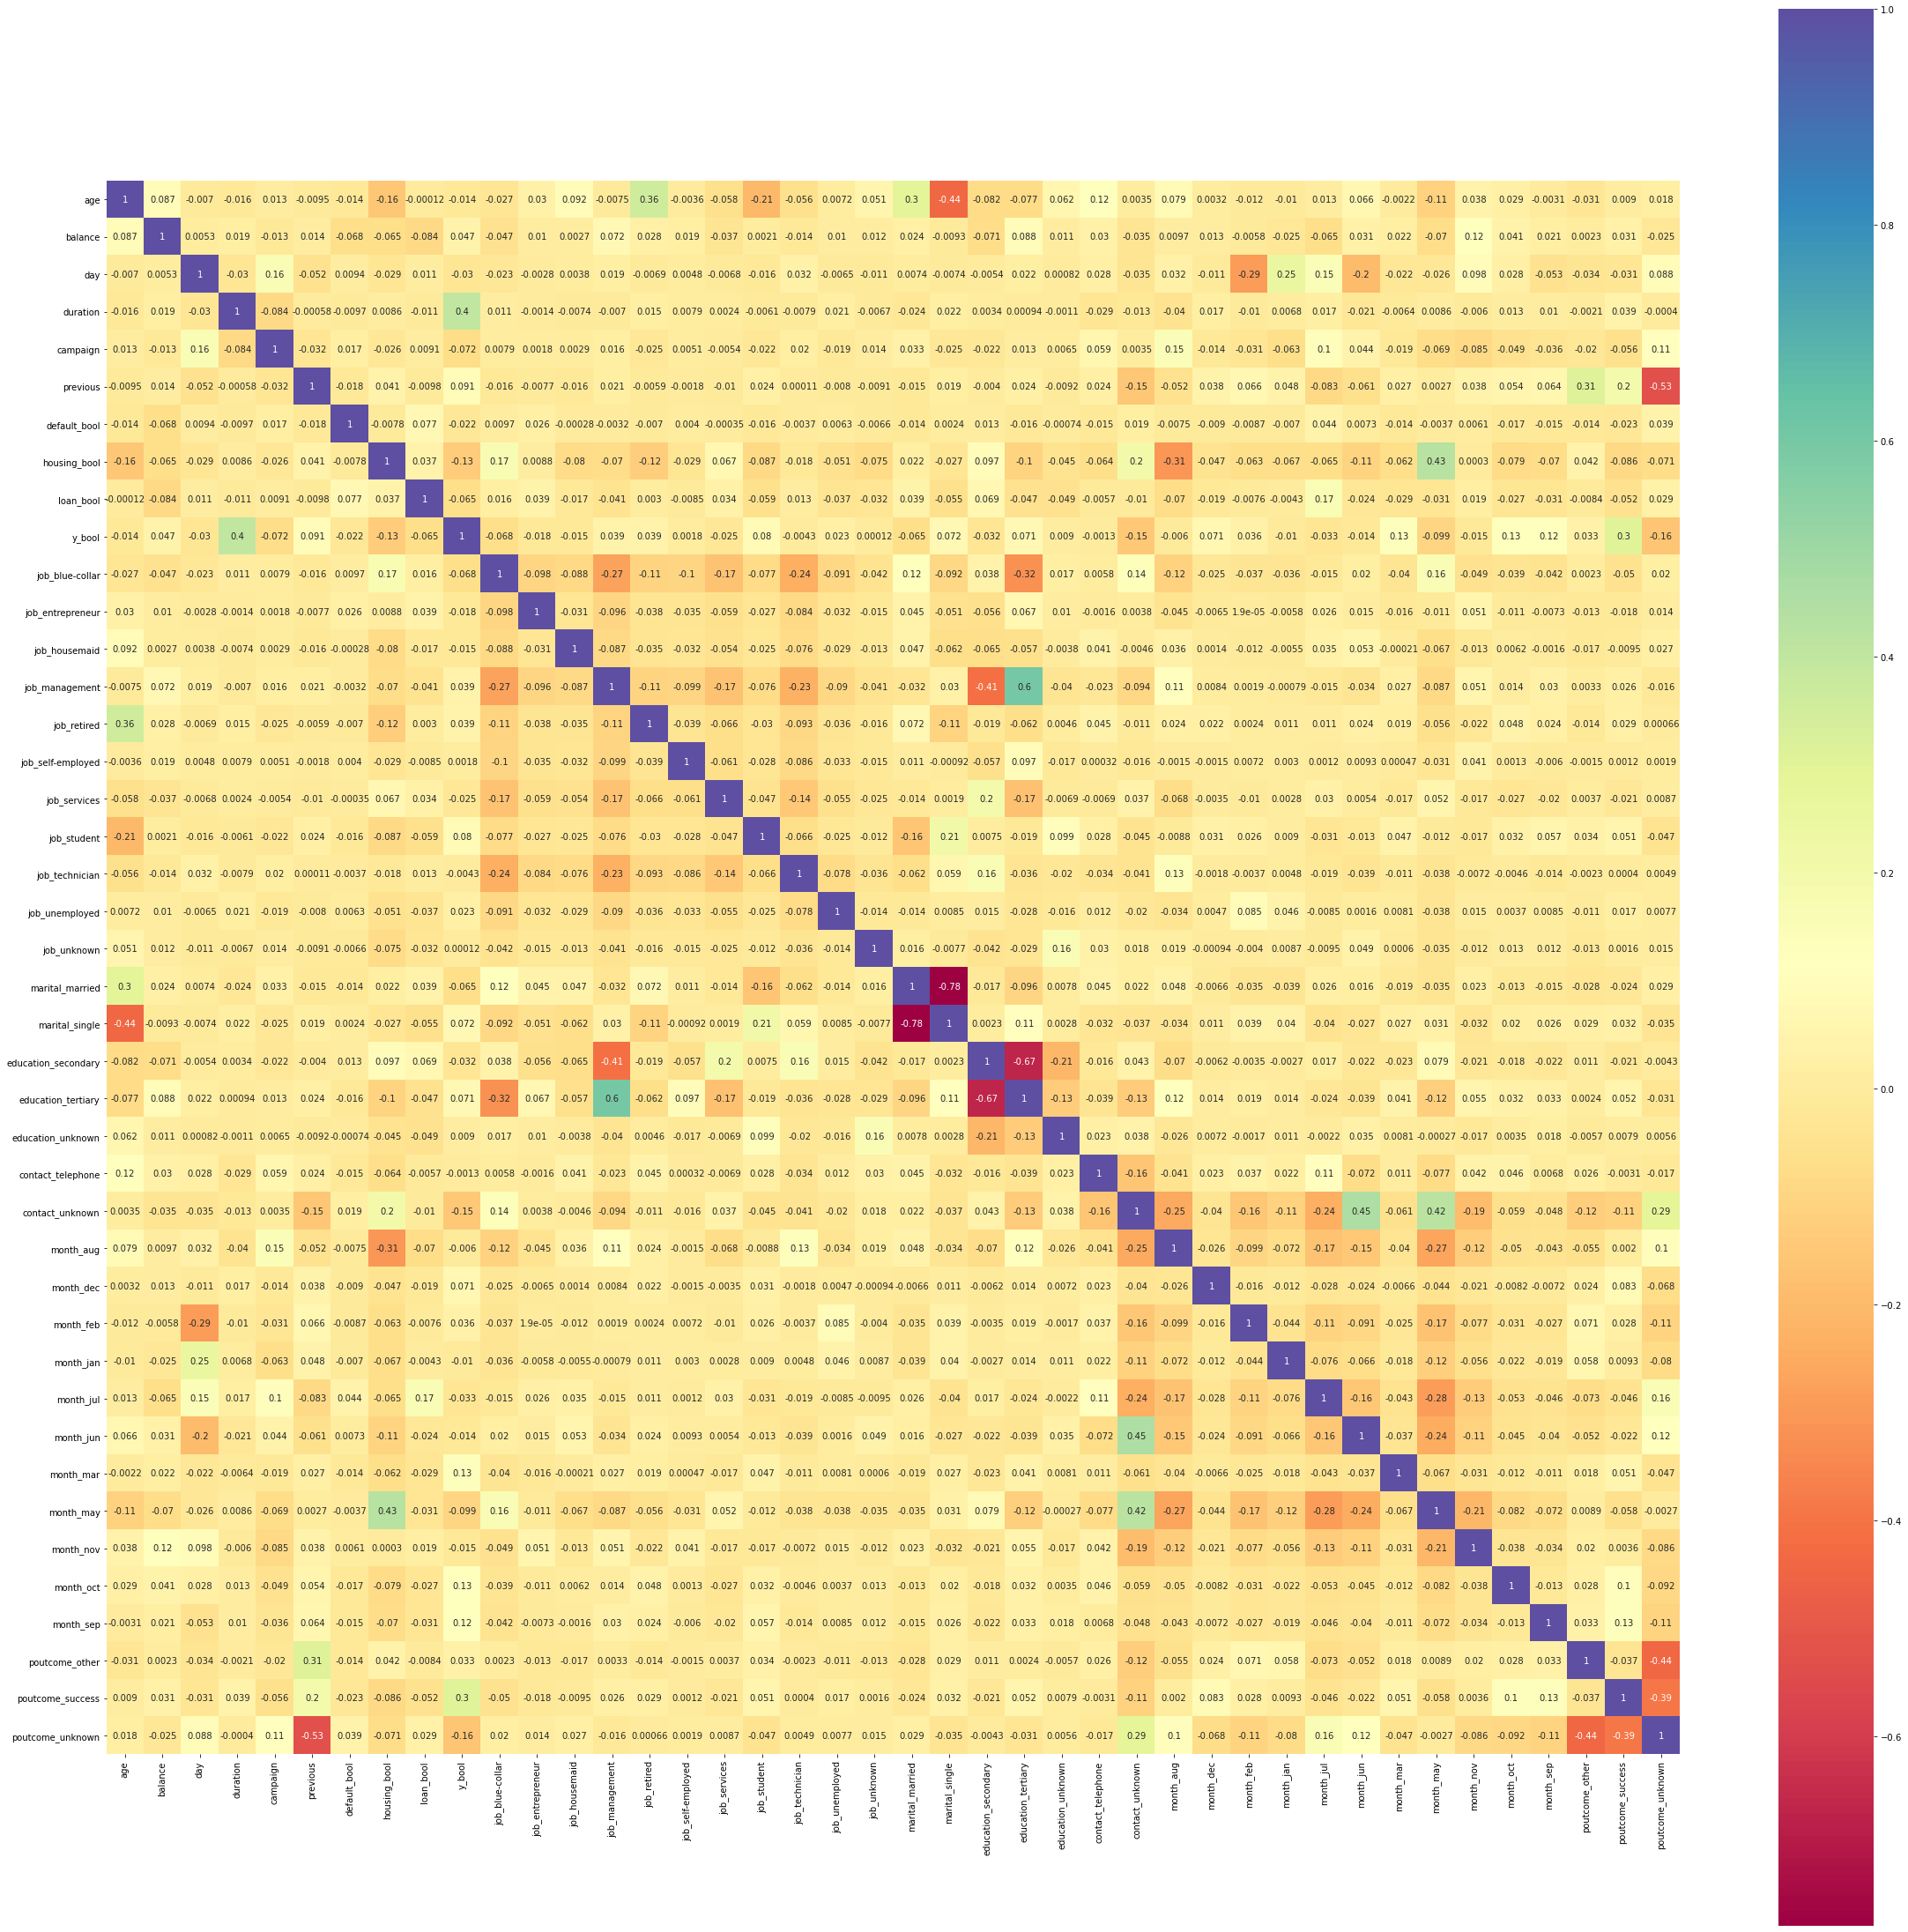

In [24]:
plt.figure(figsize=(40,40))
sns.heatmap(cleaned_df.corr(),square=True,annot=True,cmap= 'Spectral')

## ML Bölümü - Tahminleyici Analitik Algoritmalarının Uygulanması

### <b> 1- Tahminleme algoritmalarında ilk olarak  <i>Random Forest Classifier</i> seçiyoruz.<b>

Decision tree algoritmalarında en büyük problem aşırı öğrenme ve veriyi ezberlemektir. RF modeli ise bu problemi çözmek için hem veri setinden hem de öznitelik setinden rassal olarak farklı alt setler seçer ve bunları train eder. Farklı veri setleri üzerinde eğitim gerçekleştiği için overfitting problemi azalır. Sonunda ise problem regresyon ise decision tree tahminlerinin ortalaması, sınıflandırma ise tahminler arasında en çok oy alanı seçeriz.


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [26]:
X = cleaned_df.drop('y_bool', axis = 1)
y = cleaned_df['y_bool']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 101)

Hedef değişkenimizi y ye atadık ve train_test_split ile veri setimizi train(%70) ve test(%30) veri setlerine ayırdık. Daha sonrasında RF modelimizi kuracağız.

In [27]:
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                            random_state=0, max_features= 10, 
                            max_depth= 5)

rfc.fit(X_train, y_train)

rfc_predict_1 = rfc.predict(X_test)

Modelimizi kurarken tree adedini 100, maksimum derinliğini 5 olarak set ettik. N_jobs -1 ise tüm CPU kullanılacak anlamına geliyor.
Modelimize train olarak ayırdığımız veri setini fit ettikten sonra, test verileri tahminlemeye çalışıyoruz.

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     11911
           1       0.77      0.15      0.25      1507

    accuracy                           0.90     13418
   macro avg       0.83      0.57      0.60     13418
weighted avg       0.89      0.90      0.87     13418



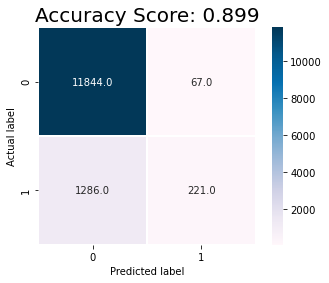

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score


print(classification_report(y_test, rfc_predict_1))

score = round(accuracy_score(y_test, rfc_predict_1),3)

cm1 = cm(y_test, rfc_predict_1) #confusion matrix (TP, TN , FP, FN)

sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 20)
plt.show()

<b>Modelimizin başarı metriklerine bakmak için confusion matrix, precision, recall ve f-1 scorelarını hesapladık. 
    <br>Accuracy score yani doğruluk oranına baktığımızda hiç görmediğimiz bir veri setinde %90 gibi bir oran yakalamışız. Burada overfitting var mı yok mu onu kontrol etmemiz gerekiyor, bunun için bir sonraki adımda cross-validation metodunu uygulamamız gerekmektedir. 
    <br>Precision değerinin yüksek olması da model seçimlerinde önemli bir kriterdir. Burda yüzde 90 ve yüzde 77 ile aslında bu modelin veri setimize uygun olabileceği düşüncesi ortaya çıkıyor.
    <br>
      
  0'ların 11.844'ünü doğru, 67 adedini ise hatalı tahminlemiş. 
    
  1'lerin ise; 221 adedini doğru, 1286 adedini hatalı tahminlemiş.

<br>
   Veri setinde hedef değerlerimizde 1'ler 0'lara göre çok az olduğu için model 1'leri iyi tahminleyemiyor. 
Bunu çözümlemek için veri setindeki bu dengesizliği aşağıdaki 2 yöntemden birini uygulayarak gidermemiz gerekiyor:
1.downsampling: y değeri 0 olan gözlemler içerisinden y değeri 1 olan gözlem sayısı kadar gözlem seçilerek yeni bir veriseti oluşturulur.
2.upsampling


## DownSampling

In [51]:
y_is_equal_to_0_data = cleaned_df[cleaned_df.y_bool == 0]
y_is_equal_to_1_data = cleaned_df[cleaned_df.y_bool == 1]

print(len(y_is_equal_to_0_data), len(y_is_equal_to_1_data))

39653 5071


In [52]:
#Hedef değişkenimizin 0 olduğu gözlem sayısını azaltarak 5.000 seviyesine çekelim
from sklearn.utils import resample
downsampled0s = resample(y_is_equal_to_0_data, replace=False, n_samples=5000, random_state=101)

print(len(downsampled0s), len(y_is_equal_to_1_data))

5000 5071


In [53]:
data_downsampled = pd.concat([y_is_equal_to_1_data , downsampled0s])
data_downsampled.shape

(10071, 42)

In [56]:
X_down = data_downsampled.drop('y_bool', axis=1)
y_down = data_downsampled['y_bool']

X_train, X_test, y_train, y_test = train_test_split(X_down,y_down,test_size = 0.3 , random_state = 101)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                            random_state=0, max_features= 10, 
                            max_depth= 5)

rfc.fit(X_train, y_train)

rfc_predict_1 = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1503
           1       0.83      0.85      0.84      1519

    accuracy                           0.84      3022
   macro avg       0.84      0.84      0.84      3022
weighted avg       0.84      0.84      0.84      3022



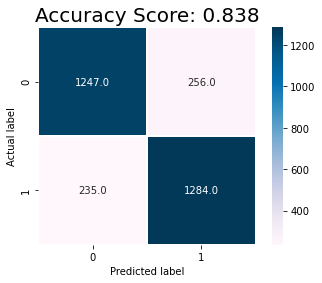

In [61]:
print(classification_report(y_test, rfc_predict_1))

score5 = round(accuracy_score(y_test, rfc_predict_1),3)

cm5 = cm(y_test, rfc_predict_1) 

sns.heatmap(cm5, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'PuBu')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score5), size = 20)
plt.show()

<b>Classification Report'ta görüldüğü üzere 0'ları tahminlemede biraz geriledik; başarı %84'e düşmüş. Ancak 1'leri tahminlemede oldukça ilerleme kaydetmiş olduk(%84),Downsampling öncesi %25ti. 
  <br>Accuracy değerimiz ise %90 dan %84'e geriledi fakat kabul edilebilir bir oran bu da.
<br>Confusion Matrix'e göre modelimiz; 
  
  0'ların 1.247'sini doğru, 256 adedini ise hatalı tahminlemiş. 
    
  1'lerin ise; 1.284 adedini doğru, 235 adedini hatalı tahminlemiş.

  Görüldüğü üzere modelimiz artık 1'leri de daha doğru tahminler durumu geldi.

## Cross-Validation

Modelimizin yüksek performansının rastgele olup olmadığınız görmemiz için cv uygulayacağız.

In [59]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(RandomForestClassifier(n_estimators = 100, 
                                             n_jobs=-1, 
                                             random_state=0, 
                                             max_features= 10, 
                                             max_depth= 5), 
                       X_train, y_train, cv=5
                      )
     )

[0.84184397 0.84822695 0.79858156 0.82765957 0.84740951]


In [60]:
print('Mean of cv-scores: {0}'.format(round(np.mean(cross_val_score(RandomForestClassifier(n_estimators=100, 
                                                                                           n_jobs=-1, 
                                                                                           random_state=101, 
                                                                                           max_features= 10, 
                                                                                            max_depth= 5), 
                                                                     X_train, y_train, cv=5)
                                                    ),3)
                                        )
     )

Mean of cv-scores: 0.832


<b>Modelimizi 5 farklı eğitim ve test veri setine böldüğümüzde ortalaması %83.2 çıktı. 
    <br>Yani RFC'da bulmuş olduğumuz %84 doğruluk oranı overfitting'den kaynaklı olmadığını görmüş olduk. Modelimiz gayet iyi çalışmış.
<b>

### <b>2- Tahminleme algoritmalarında ikinci olarak  <i>XGBoost'u </i> seçiyoruz.<b>

In [67]:
from xgboost import XGBClassifier

XGboost algoritması gradient boosting algoritmasının çeşitli düzenler sonrası yüksek performans gösteren şeklidir. Bir decision tree algoritmasıdır.

In [68]:
X = cleaned_df.drop('y_bool', axis = 1)
y = cleaned_df['y_bool']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

XGboost modeli için train ve test veri setlerini oluşturuyoruz ve parametrelerini belirliyoruz.
<br> 
XGB model ayarları için bir çok parametre mevcut. Bizim deneme yanılmalar sonrası en uygun bulup kullanmış olduklarımız şu şekilde <br> 
-- n_estimators -> modelde kurulacak ağaç sayısı<br> 
-- max_depth -> ağacın derinliğini ifade eder<br> 
-- colsample_bytree -> her bir ağacı oluştururken sütunların oluşturduğu alt veri setleridir,default u 1 dir<br> 
-- subsample -> eğitim örneklerinin alt örneklere oranı. Bu değeri 0.5 olarak ayarlamak XGBoost ağaçlarını büyütmeden önce eğitim verilerinin yarısını rastgele train edeceği anlamına gelir. Bu da overfitting i önler.

In [69]:
xgb = XGBClassifier(n_estimators=100, subsample=0.5,colsample_bytree=1, max_depth= 5)

xgb.fit(X_train,y_train.squeeze().values)

xgb_predict_1 = xgb.predict(X_test)

[10:57:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
print('XGB accuracy score: %.3f' % (accuracy_score(y_test, xgb_predict_1)))

XGB accuracy score: 0.907


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11911
           1       0.61      0.47      0.53      1507

    accuracy                           0.91     13418
   macro avg       0.77      0.72      0.74     13418
weighted avg       0.90      0.91      0.90     13418



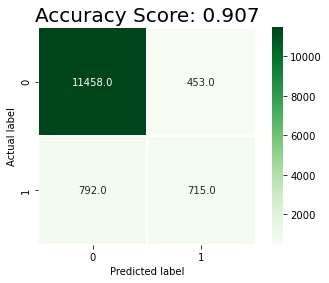

In [70]:
print(classification_report(y_test, xgb_predict_1))

score2 = round(accuracy_score(y_test, xgb_predict_1),3)

cm2 = cm(y_test, xgb_predict_1) 

sns.heatmap(cm2, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'Greens')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score2), size = 20)
plt.show()

<b>Modelimizin başarı metriklerine bakmak için confusion matrix, precision, recall ve f-1 scorelarını hesapladık. 
    <br>Accuracy score yani doğruluk oranına baktığımızda %91 gibi bir oran yakalamışız. 
    <br>Precision değerinin yüksek olması da model seçimlerinde önemli bir kriterdir. Burda vadeli mevduat almayacakları tahminlemede yüzde 94 ile çok iyi bir oran yakalamışız ancak vadeli mevduat alacakları tahminlemede yüzde 61 ile düşük bir oran gelmiş.
    <br>  
  0'ların 11.458'ini doğru, 453 adedini ise hatalı tahminlemiş. 
    
  1'lerin ise; 715 adedini doğru, 792 adedini hatalı tahminlemiş.
     <br> Bu modelimizde de 1 lerin oranını arttırmak için downsampling deneyebiliriz.
        

In [71]:
y_is_equal_to_0_data = cleaned_df[cleaned_df.y_bool == 0]
y_is_equal_to_1_data = cleaned_df[cleaned_df.y_bool == 1]

print(len(y_is_equal_to_0_data), len(y_is_equal_to_1_data))

from sklearn.utils import resample
downsampled0s = resample(y_is_equal_to_0_data, replace=False, n_samples=5000, random_state=101)

print(len(downsampled0s), len(y_is_equal_to_1_data))

39653 5071
5000 5071


In [72]:
data_downsampled = pd.concat([y_is_equal_to_1_data , downsampled0s])
data_downsampled.shape

(10071, 42)

In [73]:
X_down = data_downsampled.drop('y_bool', axis=1)
y_down = data_downsampled['y_bool']

X_train, X_test, y_train, y_test = train_test_split(X_down,y_down,test_size = 0.3 , random_state = 101)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

xgb = XGBClassifier(n_estimators=100, subsample=0.5,colsample_bytree=1, max_depth= 5)

xgb.fit(X_train,y_train.squeeze().values)

xgb_predict_1 = xgb.predict(X_test)

print('XGB accuracy score: %.3f' % (accuracy_score(y_test, xgb_predict_1)))

/Users/ulasarikaya/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB accuracy score: 0.851


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1503
           1       0.84      0.87      0.85      1519

    accuracy                           0.85      3022
   macro avg       0.85      0.85      0.85      3022
weighted avg       0.85      0.85      0.85      3022



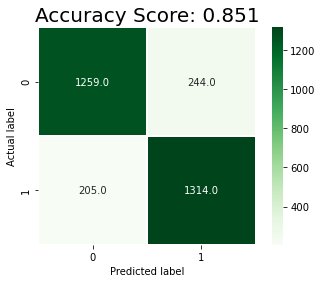

In [74]:
print(classification_report(y_test, xgb_predict_1))

score6 = round(accuracy_score(y_test, xgb_predict_1),3)

cm6 = cm(y_test, xgb_predict_1) 

sns.heatmap(cm6, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'Greens')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score6), size = 20)
plt.show()

<b>Classification Report'ta görüldüğü üzere 0'ları tahminlemede biraz geriledik; başarı %85'e düşmüş. Ancak 1'leri tahminlemede oldukça ilerleme kaydetmiş olduk(%85),Downsampling öncesi %53 tü. 
  <br>Accuracy değerimiz ise %91 den %85'e geriledi fakat kabul edilebilir bir oran bu da.
<br>Confusion Matrix'e göre modelimiz; 
  
  0'ların 1.259'unu doğru, 244 adedini ise hatalı tahminlemiş. 
    
  1'lerin ise; 1.314 adedini doğru, 205 adedini hatalı tahminlemiş.

  Görüldüğü üzere modelimiz artık 1'leri de daha doğru tahminler durumu geldi.

### <b>3- Tahminleme algoritmalarında son olarak  <i>Linear Support Vector Classifier</i> seçiyoruz.<b>

In [75]:
from sklearn.model_selection import train_test_split

X = cleaned_df.drop('y_bool', axis = 1)
y = cleaned_df['y_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, shuffle=True, stratify = y, random_state = 0)

Veri setimizin %30'unu test için ayırdık. 
Stratify: Bu parametreye hedef değişkenimi (y) değerini giriyorum. Bu şekilde böldüğüm tüm veri gruplarında y'nin oranının veri setim ile aynı olmasını sağlıyorum. 
Bu stratify'ı train_test_split'i kullanırken belirlemeliyim. 
Her çalıştırdığımızda train ve test verileri değişmesin diye random_state'e bir değer girdik.

In [76]:
#Normalizasyon – Feature Scaling yapıyoruz (Fitting)
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

<b>Scikit-Learn kütüphanesinden svm modülünü import ederek classifier nesnemizi tanımlıyoruz

In [77]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

<b>Ayırdığımız test setimizi (X_test) kullanarak oluşturduğumuz model ile tahmin yapalım  ve elde ettiğimiz değerler (y_pred) ile hedef değişken (y_test) test setimizi karşılaştıralım

In [78]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11897
           1       0.64      0.19      0.29      1521

    accuracy                           0.90     13418
   macro avg       0.77      0.59      0.62     13418
weighted avg       0.88      0.90      0.87     13418



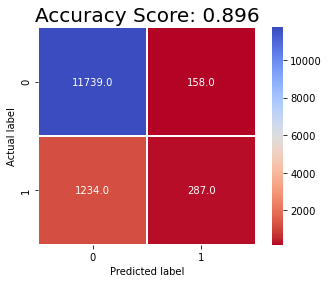

In [79]:
print(classification_report(y_test, y_pred))

score3 = round(accuracy_score(y_test, y_pred),3)

cm3 = cm(y_test, y_pred) #confuison matrix

sns.heatmap(cm3, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'coolwarm_r')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score3), size = 20)
plt.show()

Classification Report'a göre; Accuracy değerimiz %89.6. F1 scorelara baktığımızda ise 0'ları %94 başarıyla tahmin ediyor. Fakat 1'leri tahmin etmekte çok başarılı değil (%29).
Veri setinde hedef değerlerimizde 1'ler 0'lara göre çok az olduğu için model 1'leri iyi tahminleyemiyor. 
Bunu çözümlemek için veri setindeki bu dengesizliği aşağıdaki 2 yöntemden birini uygulayarak gidermemiz gerekiyor:
1.downsampling: y değeri 0 olan gözlemler içerisinden y değeri 1 olan gözlem sayısı kadar gözlem seçilerek yeni bir veriseti oluşturulur.
2.upsampling

## <b>DOWNSAMPLING  
    Veri setimizi dengelemek için burada downsapling yöntemini uygulamayı uygun gördük

In [80]:
y_is_equal_to_0_data = cleaned_df[cleaned_df.y_bool == 0]
y_is_equal_to_1_data = cleaned_df[cleaned_df.y_bool == 1]

print(len(y_is_equal_to_0_data), len(y_is_equal_to_1_data))

39653 5071


<b> Hedef değişkenimizin 0 olduğu gözlem sayısını azaltarak 5.000 seviyesine çekelim

In [81]:
from sklearn.utils import resample
downsampled0s = resample(y_is_equal_to_0_data, replace=False, n_samples=5000, random_state=101)

print(len(downsampled0s), len(y_is_equal_to_1_data))

5000 5071


In [82]:
data_downsampled = pd.concat([y_is_equal_to_1_data , downsampled0s])
data_downsampled.shape

(10071, 42)

<b>Şuan hedef değişkenimize göre daha dengeli dağılım gösteren bir veriseti elde etmiş olduk. Şimdi yukarıda uyguladığımız adımları yeniden uygulayarak tekrar Linear SVC modelini kuracağız

In [83]:
X_down = data_downsampled.drop('y_bool', axis=1)
y_down = data_downsampled['y_bool']

X_train, X_test, y_train, y_test = train_test_split(X_down, y_down , test_size = 0.3, shuffle=True, stratify = y_down, random_state = 101)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_2 = classifier.predict(X_test)

<b> Classification Report ve Confusion Matrix e tekrar bakalım 

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1500
           1       0.84      0.84      0.84      1522

    accuracy                           0.84      3022
   macro avg       0.84      0.84      0.84      3022
weighted avg       0.84      0.84      0.84      3022



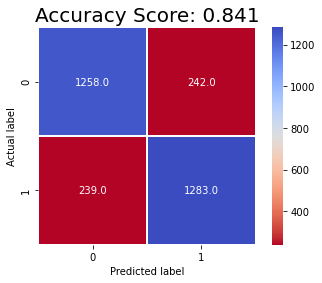

In [84]:
print(classification_report(y_test, y_pred_2))

score4 = round(accuracy_score(y_test, y_pred_2),3)

cm4 = cm(y_test, y_pred_2) 

sns.heatmap(cm4, annot=True, fmt=".1f", linewidths=.3, square = True, cmap = 'coolwarm_r')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score4), size = 20)
plt.show()

<b>Classification Report'ta görüldüğü üzere 0'ları tahminlemede biraz geriledik; başarı %84'e düşmüş. Fakat 1'leri tahminlemede oldukça ilerleme kaydetmiş olduk(%84). Accuracy değerimiz ise %90 dan %84'e geriledi.
<br>Confusion Matrix'e göre modelimiz; 
  
  0'ların 1.258'ini doğru, 242 adedini ise hatalı tahminlemiş. 
    
  1'lerin ise; 1.283 adedini doğru, 239 adedini hatalı tahminlemiş.

  Görüldüğü üzere modelimiz artık 1'leri de daha doğru tahminler durumu geldi.

# Comparison ML Models

<b> Problemimizin içeriğini tekrar hatırlatmak gerekirse; 
    <br>Portekiz bankasından alınmış olan veri setinde kurumun telefon görüşmeleri ile yapmış olduğu pazarlama kampanyaları detayları yer almaktadır. Bu telefon görüşmeleri sonucunda müşterinin "vadeli mevduat" ürününe sahip olup olmayacağı ("evet" ya da "hayır") tahminlenmeye çalışılmıştır. Problemimizin girdi ve çıktıları betimleyici analitik kısmında detaylı anlatılmıştır.
    <br> Betimleyici analitik, veri temizleme ve işleme adımlarını tamamladıktan sonra müşterinin "vadeli mevduat" ürününe sahip olup olmayacağını üç farklı tahminleme modeli ile çalıştık. 
    <br> Bu modeller; 
    <i><br> 1) Random Forest Classifier
    <br> 2) Gradient Boosting (XGBoost Classifier)
    <br> 3) Linear Support Vector Classifier</i>

<b>1)
<img src="RFC.png">

<b>2)
<img src="XGBoost.png">

<b>3)
<img src="LS.png">

Kullanmış olduğumuz modelleri karşılaştırırken accuracy, precision ve F1 değerlerini inceliyoruz.
<br>Accuracy en yüksek <b>%85.1</b> ile <i>XGBoost</i> algoritması oluyor, daha sonra <b>84.1</b> <i>Linear SVC</i> ve <b>83.8</b> <i>Random Forest</i> geliyor.

<br> F1 değerlerine baktığımızda ise <b>%85</b> ile <i>XGBoost</i> yine en iyi tahminde bulunan model oluyor.

<b>Sonuç olarak Gradient Boosting XGBoost modeli, potansiyel bir müşterinin vadeli mevduat açtırıp açtırmayacağını tahmin etmek için en iyi model olduğuna karar veriyoruz.